# Perceptron monocouche

## Classification à 3 classes (table 3.1)

In [1]:
from perceptron.monocouche import NeuronType, Layer
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np

data = load_dataframe_from_file('../datasets/table_3_1.csv', nbr_labels=3)
exemple1 = Layer(nbr_neurones=3, input_size=2, neurone_type=NeuronType.ADALINE, learning_rate=0.001, epochs=200)
exemple1.train_layer(dataset=data, seuil=0.01, initiate_weights_zero=True)
# for row in  data.itertuples() :
#     pred, round_pred = exemple1.predict(row.inputs)
#     print(f"Prédiction arondie : {round_pred} pour {row.inputs}, expected {row.label}, This affirmation is correct :{round_pred==row.label}")

In [2]:
for history in exemple1.get_history():
    print(history)

# print(exemple1.predict(1))

epoch                                                       2
mse                                                   0.13448
accuracy                                                  1.0
weights     [0.029713075643574872, -0.2571570155205675, -0...
Name: 1, dtype: object
epoch                                                      10
mse                                                  0.218739
accuracy                                                  1.0
weights     [-0.5851740713025274, -0.09650155919228956, 0....
Name: 9, dtype: object
epoch                                                       2
mse                                                  0.144613
accuracy                                                  1.0
weights     [-0.02134521547874607, 0.2662315736075099, -0....
Name: 1, dtype: object


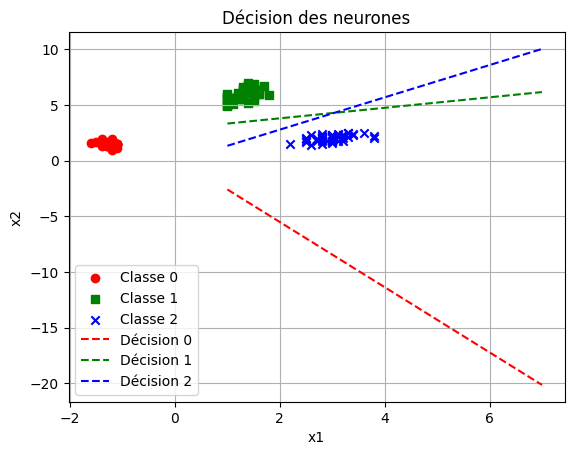

In [3]:
dataset = load_dataframe_from_file('../datasets/table_3_1.csv', nbr_labels=3, add_x0=False)
inputs = np.stack(dataset["inputs"].values)  # shape (n_samples, 2)
labels = np.stack(dataset["label"].values)   # shape (n_samples, 3)

colors = ['red', 'green', 'blue']
markers = ['o', 's', 'x']

# Nuage de points : on affiche les données selon leur classe dominante
dominant_class = np.argmax(labels, axis=1)
for i in range(3):
    class_points = inputs[dominant_class == i]
    plt.scatter(class_points[:, 0], class_points[:, 1],  # x1 = inputs[:,1], x2 = inputs[:,2]
                color=colors[i], marker=markers[i], label=f'Classe {i}')

# Tracer des droites de décision
x_vals = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
for idx, neuron in enumerate(exemple1.neurons):
    w = neuron.weights
    # Equation : w0 + w1*x + w2*y = 0 => y = -(w0 + w1*x)/w2
    if w[2] != 0:
        y_vals = -(w[0] + w[1] * x_vals) / w[2]
        plt.plot(x_vals, y_vals, color=colors[idx], linestyle='--', label=f'Décision {idx}')
    else:
        # verticale : x = -w0 / w1
        x_const = -w[0] / w[1]
        plt.axvline(x=x_const, color=colors[idx], linestyle='--', label=f'Décision {idx} (verticale)')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Décision des neurones")
plt.grid(True)
plt.show()

In [4]:
print(inputs[dominant_class == 2])

[[2.8 1.9]
 [2.9 1.8]
 [2.2 1.5]
 [2.5 1.7]
 [3.1 2.3]
 [2.8 2.4]
 [3.1 1.8]
 [3.3 2.5]
 [3.4 2.3]
 [3.  2.1]
 [2.6 1.4]
 [3.1 2.1]
 [2.7 1.9]
 [3.  1.8]
 [3.8 2. ]
 [2.8 2.1]
 [2.8 2. ]
 [3.  1.6]
 [2.9 1.8]
 [3.  1.8]
 [2.8 1.5]
 [2.8 2.2]
 [3.2 2.3]
 [3.  2.1]
 [3.3 2.5]
 [3.1 2.4]
 [2.7 1.9]
 [3.2 2.3]
 [3.  2.1]
 [3.2 2. ]
 [3.  2. ]
 [3.2 2.3]
 [2.8 2. ]
 [3.6 2.5]
 [3.4 2.4]
 [3.  2.3]
 [2.5 1.8]
 [2.6 2.3]
 [3.  2.2]
 [3.  1.8]
 [3.2 1.8]
 [2.7 1.8]
 [3.  1.8]
 [2.7 1.9]
 [2.5 1.9]
 [3.3 2.1]
 [2.8 1.8]
 [3.8 2.2]
 [2.5 2. ]
 [3.  2.3]]


## Classification à 4 classes (table 3.5)

In [5]:
dataset = load_dataframe_from_file('../datasets/table_3_5.csv', nbr_labels=4)
exemple2 = Layer(nbr_neurones=4, input_size=25, neurone_type=NeuronType.ADALINE, learning_rate=0.001, epochs=1000)
exemple2.train_layer(dataset=dataset, seuil=0, initiate_weights_zero=True)
for history in exemple2.get_history() :
    print(history)

epoch                                                     180
mse                                                  0.129035
accuracy                                                  1.0
weights     [0.00046421863138291315, -0.0661108885266949, ...
Name: 179, dtype: object
epoch                                                       1
mse                                                  0.493036
accuracy                                                  1.0
weights     [-0.0019990019899999998, -0.001001002, 0.0, 0....
Name: 0, dtype: object
epoch                                                       1
mse                                                  0.493042
accuracy                                                  1.0
weights     [-0.00199502199, 0.0010029980000000002, 0.0, -...
Name: 0, dtype: object
epoch                                                      55
mse                                                  0.346169
accuracy                                                  1.0